In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import math

In [3]:
# Load dataset
df = sns.load_dataset('titanic')

In [4]:
df.shape

(891, 15)

In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
categorical = df.dtypes[df.dtypes == 'object'].index
print(categorical)

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')


In [12]:
df[categorical].describe()

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [13]:
df.sex.describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

In [15]:
temp = pd.Categorical(df.sex)

In [16]:
temp

[male, female, female, female, male, ..., male, female, female, male, male]
Length: 891
Categories (2, object): [female, male]

In [17]:
temp = temp.rename_categories(['male', 'female'])

In [19]:
temp.describe()

,counts,freqs
categories,,
male,314,0.352413
female,577,0.647587


In [20]:
new_Pclass = pd.Categorical(df["pclass"], ordered=True)

In [21]:
new_Pclass

[3, 1, 3, 1, 3, ..., 2, 1, 3, 1, 3]
Length: 891
Categories (3, int64): [1 < 2 < 3]

In [23]:
new_Pclass= new_Pclass.rename_categories(['Class1', 'Class2', 'Class3'])

In [24]:
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [25]:
df.pclass = new_Pclass

In [30]:
df.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [34]:
missing = np.where(df['age'].isnull() == True)

In [36]:
len(missing[0])

177

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a275e26d0>]],
      dtype=object)

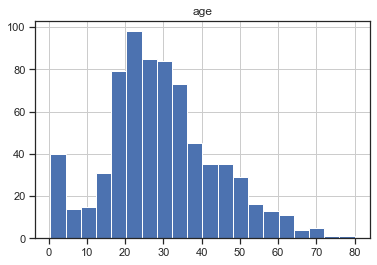

In [37]:
df.hist(column=['age'], bins=20)

In [38]:
new_age = np.where(df.age.isnull(), 28, df.age)

In [40]:
df.age = new_age

In [43]:
df.age.isnull().sum()

0

In [44]:
df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a231cf1d0>]],
      dtype=object)

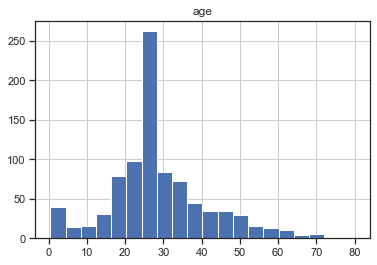

In [45]:
df.hist(column=['age'], bins=20)

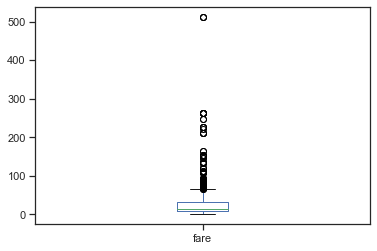

In [46]:
df.fare.plot(kind='box')

In [47]:
index = np.where(df.fare == df.fare.max())

In [48]:
index

(array([258, 679, 737]),)

In [49]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,Class3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,Class1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,Class3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,Class1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,Class3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Class2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,Class1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,Class3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,Class1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [51]:
df.pclass.describe()

count        891
unique         3
top       Class3
freq         491
Name: pclass, dtype: object

In [52]:
pd.crosstab(index=df.sex, columns='count')

col_0,count
sex,
female,314
male,577


In [53]:
pd.crosstab(index=df.pclass, columns='count')

col_0,count
pclass,
Class1,216
Class2,184
Class3,491


In [55]:
deck = pd.crosstab(index=df.deck, columns='count')

In [56]:
deck

col_0,count
deck,
A,15
B,47
C,59
D,33
E,32
F,13
G,4


In [57]:
deck / deck.sum()

col_0,count
deck,
A,0.073892
B,0.231527
C,0.290640
D,0.162562
E,0.157635
F,0.064039
G,0.019704


In [62]:
survived = pd.crosstab(index=df.survived, columns=df.sex)
survived.index = ['died', 'survived']

In [63]:
survived

sex,female,male
died,81,468
survived,233,109


In [69]:
survived = pd.crosstab(index=df.survived, columns=df.pclass)
survived.columns = ['class1', 'class2', 'class3']
survived.index = ['died', 'survived']

In [66]:
survived

,class1,class2,class3
died,80,97,372
survived,136,87,119


In [79]:
survived = pd.crosstab(index=df.survived, columns=df.pclass, margins=True)
survived.columns = ['class1', 'class2', 'class3', 'rowtotal']
survived.index = ['died', 'survived', 'coltotal']
survived

,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
coltotal,216,184,491,891


In [84]:
survived / survived.loc['coltotal', 'rowtotal']

,class1,class2,class3,rowtotal
died,0.089787,0.108866,0.417508,0.616162
survived,0.152637,0.097643,0.133558,0.383838
coltotal,0.242424,0.206510,0.551066,1.000000


In [85]:
survived / survived.loc['coltotal']

,class1,class2,class3,rowtotal
died,0.37037,0.527174,0.757637,0.616162
survived,0.62963,0.472826,0.242363,0.383838
coltotal,1.00000,1.000000,1.000000,1.000000


In [89]:
pd.crosstab(index=df.pclass, columns=[df.sex, df.alive], margins=True)

sex    female      male       All
alive      no  yes   no  yes     
pclass                           
Class1      3   91   77   45  216
Class2      6   70   91   17  184
Class3     72   72  300   47  491
All        81  233  468  109  891